# Klasyfikacja obrazu za pomocą konwolucyjnych sieci neuronowych

## Przygotowanie 

In [ ]:
!pip install 'pillow<7.0.0'

     |████████████████████████████████| 2.1MB 17.1MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


In [ ]:
# Put these at the top to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ torchvision==0.2.2.post3

Looking in indexes: https://test.pypi.org/simple/, https://pypi.org/simple/
     |████████████████████████████████| 71kB 8.5MB/s 
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101


In [ ]:
!pip install torch torchvision fastai==0.6

     |████████████████████████████████| 430kB 15.2MB/s 
     |████████████████████████████████| 3.5MB 52.4MB/s 
     |████████████████████████████████| 1.5MB 54.4MB/s 
     |████████████████████████████████| 20.9MB 84.4MB/s 
     |████████████████████████████████| 112kB 59.0MB/s 
     |████████████████████████████████| 7.2MB 50.0MB/s 
     |████████████████████████████████| 71kB 11.6MB/s 
     |████████████████████████████████| 552kB 53.7MB/s 
     |████████████████████████████████| 870kB 53.4MB/s 
     |████████████████████████████████| 481kB 55.9MB/s 
     |████████████████████████████████| 81kB 13.9MB/s 
     |████████████████████████████████| 143kB 64.2MB/s 
     |████████████████████████████████| 112kB 61.1MB/s 
     |████████████████████████████████| 51kB 9.4MB/s 
     |████████████████████████████████| 143kB 54.5MB/s 
  Created wheel for fastai: filename=fastai-0.6-cp36-none-any.whl size=69788 sha256=88f31a46b95699050adb574a3f97cdad6c895a9923e4f5087593ef9e56708de4
  Stored in di

In [ ]:
!pip install torch torchvision fastai==0.7.0

     |████████████████████████████████| 122kB 17.6MB/s 
     |████████████████████████████████| 133kB 29.3MB/s 
ERROR: kaggle-cli 0.12.13 has requirement lxml<4.1,>=4.0.0, but you'll have lxml 4.2.6 which is incompatible.
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.7.0+cu101 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: fastai 0.6
    Uninstalling fastai-0.6:
      Successfully uninstalled fastai-0.6
  Found existing installation: urllib3 1.26.3
    Uninstalling urllib3-1.26.3:
      Successfully uninstalled urllib3-1.26.3


In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

from pathlib import Path
import os

def download_and_save(file_name, file_id):
  downloaded = drive.CreateFile({'id': file_id})
  # fetch file
  downloaded.FetchContent()
  # write file
  with open(file_name,'wb') as f:
       f.write(downloaded.content.read())
      
  print(f'Saved {file_name}')
  
FILE_NAME, FILE_ID = ['file_name', 'file_id']

### Pobierz zbiory danych

In [67]:
dataset_path = Path('/content/data/dogs'); dataset_path
!mkdir -p $dataset_path
!ls -la $dataset_path

total 29504
drwxr-xr-x 3 root root     4096 Feb  5 18:43 .
drwxr-xr-x 3 root root     4096 Feb  5 18:43 ..
drwxr-xr-x 3 root root     4096 Feb  5 18:43 dogs4
-rw-r--r-- 1 root root 30197097 Feb  5 18:43 dogs4.zip


### split dataset

In [ ]:
# https://drive.google.com/file/d/1Oga-k0L5bqVYgafkYP_GYSaPk4_BUQCg/view?usp=sharing

dogs = {FILE_NAME: 'dogs4.zip', FILE_ID: '1Oga-k0L5bqVYgafkYP_GYSaPk4_BUQCg'}
dogs_path = dataset_path / dogs[FILE_NAME]
download_and_save(dogs_path, dogs[FILE_ID])

In [ ]:
# unpack
!unzip data/dogs/dogs4.zip -d /content/data/dogs/dogs4


Archive:  data/dogs/dogs4.zip
   creating: /content/data/dogs/dogs4/dogs/
   creating: /content/data/dogs/dogs4/dogs/train/
   creating: /content/data/dogs/dogs4/dogs/train/beagle/
  inflating: /content/data/dogs/dogs4/dogs/train/beagle/n02088364_10108.jpg  
  inflating: /content/data/dogs/dogs4/dogs/train/beagle/n02088364_10206.jpg  
  inflating: /content/data/dogs/dogs4/dogs/train/beagle/n02088364_10296.jpg  
  inflating: /content/data/dogs/dogs4/dogs/train/beagle/n02088364_10354.jpg  
  inflating: /content/data/dogs/dogs4/dogs/train/beagle/n02088364_10362.jpg  
  inflating: /content/data/dogs/dogs4/dogs/train/beagle/n02088364_10575.jpg  
  inflating: /content/data/dogs/dogs4/dogs/train/beagle/n02088364_10585.jpg  
  inflating: /content/data/dogs/dogs4/dogs/train/beagle/n02088364_10731.jpg  
  inflating: /content/data/dogs/dogs4/dogs/train/beagle/n02088364_10798.jpg  
  inflating: /content/data/dogs/dogs4/dogs/train/beagle/n02088364_10947.jpg  
  inflating: /content/data/dogs/dogs4/d

## Załadowanie bibliotek

In [ ]:
!ln -s /content/plots_wcz.py /content/fastai/fastai/plots_wcz.py
!ln -s /content/imports_wcz.py /content/fastai/fastai/imports_wcz.py
!ln -s /content/model_wcz.py /content/fastai/fastai/model_wcz.py
!cd /content/fastai

ln: failed to create symbolic link '/content/fastai/fastai/plots_wcz.py': No such file or directory
ln: failed to create symbolic link '/content/fastai/fastai/imports_wcz.py': No such file or directory
ln: failed to create symbolic link '/content/fastai/fastai/model_wcz.py': No such file or directory
/bin/bash: line 0: cd: /content/fastai: No such file or directory


In [1]:
# Umieść je na górze każdego notatnika, aby uzyskać automatyczne ponowne ładowanie
%reload_ext autoreload
%autoreload 2

#matplotlib setup
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')
mpl.style.use('seaborn-ticks')
# %config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
import shutil as sh

# Ten plik zawiera wszystkie główne biblioteki zewnętrzne, których użyjemy
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *

from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

## Mój dataset: 'Dogs'

In [3]:
PATH = "/content/data/dogs/dogs4/dogs"

In [4]:
ls -lah /content/data/dogs/dogs4/dogs

total 24K
drwxr-xr-x 6 root root 4.0K Feb  5 18:44 ./
drwxr-xr-x 3 root root 4.0K Feb  5 18:43 ../
drwxr-xr-x 2 root root 4.0K Feb  5 18:44 models/
drwxr-xr-x 5 root root 4.0K Feb  5 18:44 tmp/
drwxr-xr-x 6 root root 4.0K Feb  5 12:04 train/
drwxr-xr-x 6 root root 4.0K Feb  5 12:04 valid/


## Sprawdzenie, czy dataset jest dostępny

In [5]:
!ls {PATH}

models	tmp  train  valid


In [6]:
!ls {PATH}/valid

beagle	Maltese_dog  Norwegian_elkhound  Saint_Bernard


In [7]:
files = !ls {PATH}/valid/"Saint_Bernard" | head
files

['n02109525_1100.jpg',
 'n02109525_1271.jpg',
 'n02109525_1314.jpg',
 'n02109525_1480.jpg',
 'n02109525_1502.jpg',
 'n02109525_1575.jpg',
 'n02109525_1624.jpg',
 'n02109525_1717.jpg',
 'n02109525_1741.jpg',
 'n02109525_1843.jpg']

In [8]:
files[5]

'n02109525_1575.jpg'

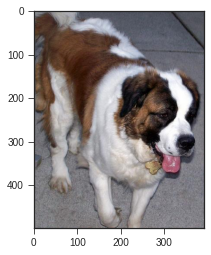

In [9]:
img = plt.imread(f'{PATH}/valid/Saint_Bernard/{files[8]}')
plt.imshow(img);

## Trenowanie klasyfikatora

### Augmentacja danych oraz cache aktywacji

augmentacja danych: `aug_tfms=transforms_side_on, max_zoom=1.1`
cache aktywacji: `precompute=True`

In [57]:
sz=224  # sz=128
arch=resnet34

tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

### Znajdowanie tempa uczenia się

In [ ]:
# znajdz tempo uczenia sie
lrf = learn.lr_find()

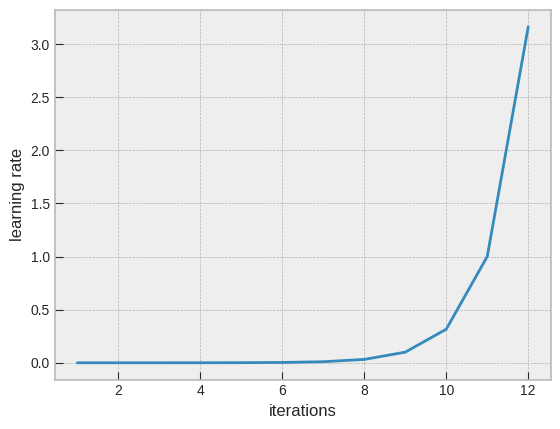

In [60]:
mpl.style.use('bmh')
learn.sched.plot_lr()

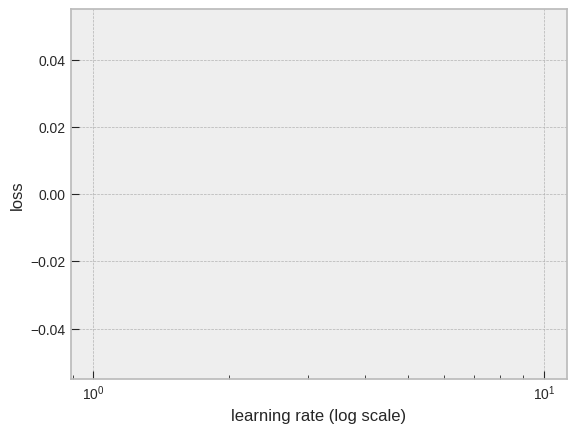

In [75]:
learn.sched.plot()

wybrany lr=0.08

In [14]:
0.8*10**-1

0.08000000000000002

###  Wstępne wytrenowanie ostatniej warstwy

In [15]:
learn.metrics=[]
learn.fit(0.008, 3)  # stałe tempo uczenia się

epoch      trn_loss   val_loss   
    0      0.514502   0.0       
    1      0.69277    0.094089  
    2      0.65725    0.028753  



[0.028753207996487617]

In [16]:
learn.save('224_initial')

In [17]:
learn.load('224_initial')

### Trening ostatniej warstwy z augmentacją danych i wywarzanie tempa uczenia się

In [18]:
# tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [19]:
# transformers for training
tfms[0].tfms

In [20]:
# transformers for validation
tfms[1].tfms

In [21]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [22]:
ims = np.stack([get_augs() for i in range(6)])

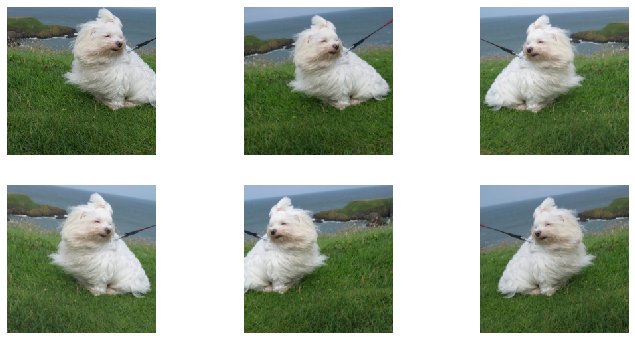

In [23]:
plots(ims, rows=2)

Trenuj ostatnią warstwę z augmentacją danych (tj. `precompute=False`) przez 2-3 epoki z `cycle_len=1`

In [24]:
learn.precompute=False  # użyj augmentacji danych
learn.metrics=[]
learn.fit(0.08, 3, cycle_len=1)

epoch      trn_loss   val_loss   
    0      0.437294   0.00067   
    1      0.362836   0.003786  
    2      0.33801    0.0       



[0.0]

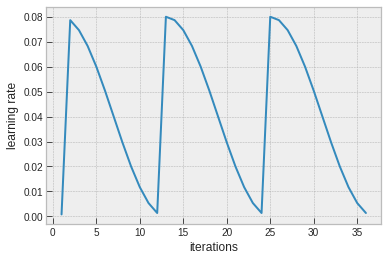

In [25]:
learn.sched.plot_lr()

In [26]:
#save model
learn.save('224_lastlayer')

In [27]:
learn.load('224_lastlayer')

### Dostrojenie (fine-tune) wcześniejsze warstwy
Odblokuj wszystkie warstwy, używając `unfreeze()`.<br/>
Ustaw dla wcześniejszych warstw 3x-10x mniejsze tempo uczenia się niż dla kolejnych wyższych warstw.

In [28]:
learn.unfreeze()

In [29]:
lr = np.array([0.0008, 0.008, 0.08])
learn.metrics=[]
learn.fit(lr, 3, cycle_len=1)

epoch      trn_loss   val_loss   
    0      8.987423   126.870682
    1      16.140773  742.906555
    2      15.478755  63.037418 



[63.037418365478516]

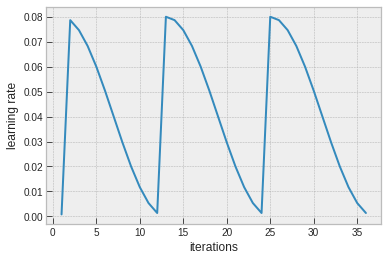

In [30]:
learn.sched.plot_lr()

In [31]:
learn.save('224_all')

In [32]:
learn.load('224_all')

In [33]:
lrf = learn.lr_find()

epoch      trn_loss   val_loss   
    0      54.225008  nan       



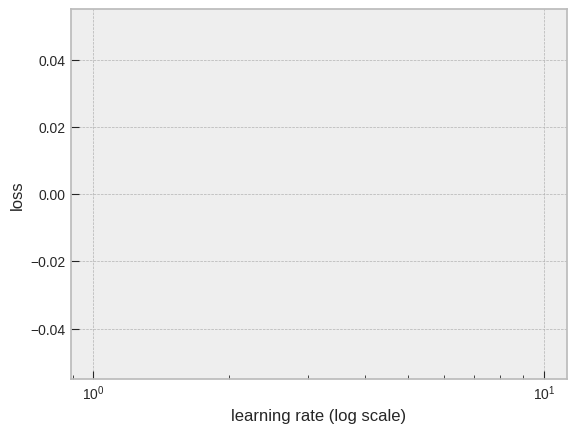

In [62]:
learn.sched.plot()

In [35]:
lr = np.array([0.00001, 0.0001, 0.001])

### Trening całej sieci z cycle_mult=2 aż do przetrenowania (over-fitting)

In [36]:
learn.metrics=[]
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   
    0      11.414068  9.060978  
    1      10.539889  4.068829  
    2      9.427726   3.683472  
    3      8.674162   2.773783  
    4      7.924115   2.569151  
    5      7.515379   2.448675  
    6      7.354984   2.451535  



[2.451534926891327]

In [37]:
learn.save('224_final')

In [38]:
learn.load('224_final')

## Kontrola jakości na zestawie walidacyjnym

### Prognoza z użyciem TTA (Test Time Augmentation)

In [39]:
log_preds_tta, y_tta = learn.TTA()

In [40]:
probs_tta = np.mean(np.exp(log_preds_tta),0)
preds_tta = np.argmax(probs_tta, axis=1)  # from log probabilities to 0 or 1

In [41]:
probs_tta[0:3, :]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [42]:
# preds_tta[:3]

In [43]:
accuracy_np(probs_tta, y_tta)

0.8671875

Zwykle widać 10-20 procentowy spadek błędu na tym zestawie danych podczas korzystania z TTA w tym momencie, co jest niesamowitym wynikiem dla tak szybkiej i prostej techniki!

### Prognoza bez TTA

In [44]:
# to tworzy prognozę dla zestawu walidacyjnego. Prognozy są w skali logarytmicznej
log_preds = learn.predict()
y = data.val_y

In [45]:
preds = np.argmax(log_preds, axis=1)  # od logarytmu prawdopodobieństwa do 0, 1, ... lub 9
probs = np.exp(log_preds);            # pr(car)

In [46]:
probs[0:3, :]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [47]:
preds[:150]

array([0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 1, 3, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 1, 1, 3, 2, 2, 3, 1, 3])

In [48]:
print('preds: ', len(preds), preds[0:10], '\nprobs: ', len(probs), probs[0:10])

preds:  128 [0 0 0 0 0 0 0 0 3 0] 
probs:  128 [[1.      0.      0.      0.     ]
 [1.      0.      0.      0.     ]
 [1.      0.      0.      0.     ]
 [1.      0.      0.      0.     ]
 [1.      0.      0.      0.     ]
 [1.      0.      0.      0.     ]
 [1.      0.      0.      0.     ]
 [1.      0.      0.      0.     ]
 [0.00001 0.      0.      0.99999]
 [1.      0.      0.      0.     ]]


In [49]:
accuracy_np(probs, y)

0.859375

## Analiza wyników - tablica pomyłek

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
# use to check TTA predictions
# y = y_tta
# preds = preds_tta

[[30  0  0  2]
 [ 0 29  0  3]
 [ 0  2 26  4]
 [ 0  4  3 25]]


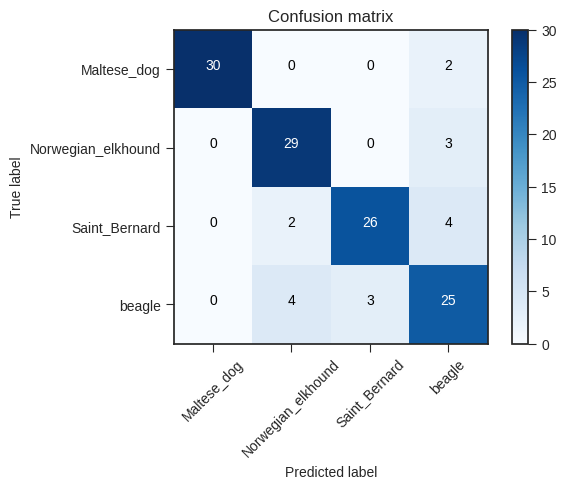

In [52]:
cm = confusion_matrix(y, preds)

mpl.style.use('default')
mpl.style.use('seaborn-ticks')
plot_confusion_matrix(cm, data.classes)